# Code

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("mymoviedb.csv",lineterminator = '\n')

In [3]:
data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [4]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [5]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"]).dt.year

In [6]:
data = data.drop(["Overview", "Original_Language", "Poster_Url"],axis = 1)

In [7]:
def categ(data , col, lables):
    categories = [data[col].describe()["min"],
                  data[col].describe()["25%"],
                  data[col].describe()["50%"],
                  data[col].describe()["75%"],
                  data[col].describe()["max"]
        
                  ]
    data[col] = pd.cut(data[col], categories, labels = labels, duplicates = "drop")
    return data

In [8]:
labels = ["not_popular", "below_avg", "average", "popular"]
data = categ(data, "Vote_Average", labels)

In [9]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [10]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [11]:
data["Genre"]= data["Genre"].str.split(', ')

In [12]:
data = data.explode("Genre").reset_index(drop = True)

In [13]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [14]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [15]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


# Reference Questions

## 1) What is the most frequent genre of movies released on Netflix ?

In [16]:
import seaborn as sns

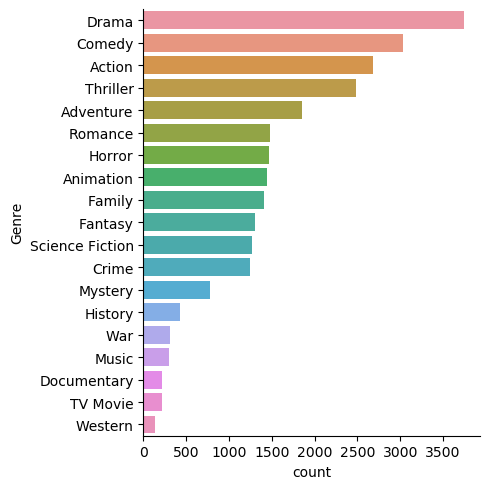

In [17]:
sns.catplot(y = "Genre" , data = data , kind = "count" ,
           order = data['Genre'].value_counts().index)

## 2) What genrers has highest votes ?

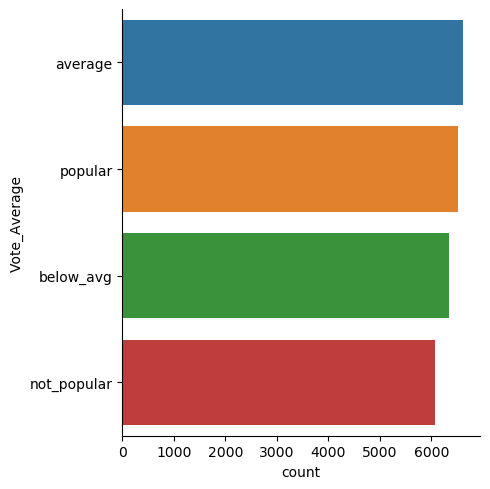

In [18]:
sns.catplot( y = "Vote_Average", data = data , kind = "count",
           order = data["Vote_Average"].value_counts().index)

## 3) What movie got the highest popularity ?What's its genre ?

In [19]:
data[data["Popularity"] == data["Popularity"].describe()["max"]]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


## 4) What movie got the lowest popularity ?What's its genre?

In [20]:
data[data["Popularity"] == data["Popularity"].describe()["min"]]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


## 5) Which year has the most filmmed movies ?

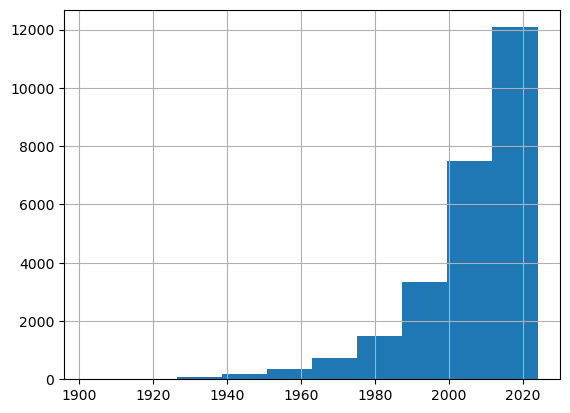

In [21]:
data["Release_Date"].hist()

In [22]:
data.to_csv("calculated_netflix_data", index = "False")

# Some Analysis


## 1) What are the top 5 most frequent genres on Netflix ?

In [23]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


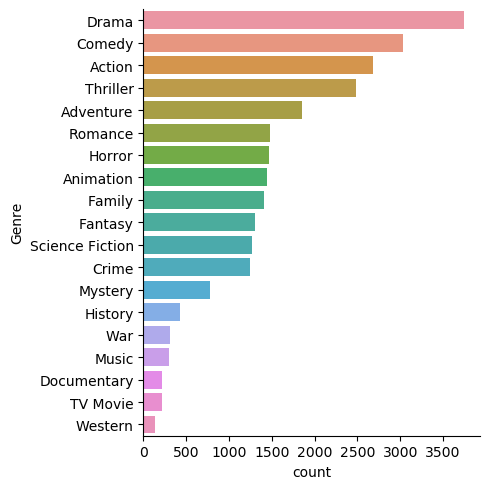

In [24]:
sns.catplot(y="Genre", data = data, kind = "count",
           order = data["Genre"].value_counts().index)

In [25]:
top_list = data["Genre"].value_counts()

In [26]:
top_list[:5]

Drama        3744
Comedy       3031
Action       2686
Thriller     2488
Adventure    1853
Name: Genre, dtype: int64

## 2) Which Genre has the lowest number of movies ?

In [27]:
lowest_Genre = (data["Genre"].value_counts())[::-1]

In [28]:
lowest_Genre[:1]

Western    137
Name: Genre, dtype: int64

## 3) What are the top 10 most popular movies on Netflix ?

In [29]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [30]:
top_10_movies = pd.DataFrame({"Title":data["Title"], "Vote_Count":data["Vote_Count"]})

In [31]:
top_10_movies = top_10_movies.drop_duplicates()

In [32]:
top_10_movies = top_10_movies.sort_values(by = "Vote_Count", ascending=False)

In [33]:
top_10_movies[:10]

,Title,Vote_Count
1090,Inception,31077
1309,Interstellar,27975
627,The Dark Knight,26994
394,The Avengers,26490
555,Deadpool,26390
259,Avatar,25011
196,Avengers: Infinity War,24079
3468,Guardians of the Galaxy,24024
1164,Fight Club,23620
3723,Pulp Fiction,22733


## 4) What is the Oldest movie available on Netflix ? 

In [34]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [35]:
movies_time = data.sort_values(by = "Release_Date")

In [36]:
movies_time = movies_time.drop("Genre", axis=1)

In [37]:
movies_time = movies_time.drop_duplicates()

In [38]:
movies_time.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average
16441,1902,A Trip to the Moon,18.356,1284,popular
17131,1920,The Cabinet of Dr. Caligari,17.858,1075,popular
21085,1921,The Phantom Carriage,15.371,213,popular
23263,1921,The Kid,14.338,1528,popular
21467,1922,Häxan,15.164,241,popular
8878,1922,Nosferatu,28.638,1406,popular
16056,1925,Battleship Potemkin,18.663,840,popular
25310,1926,Faust,13.514,242,popular
21056,1926,The General,15.388,846,popular
24717,1927,Wings,13.756,182,popular


## 5) Which year recieved the highest average movie votes?

In [39]:
duplicate_data = data.drop("Genre", axis = 1)

In [40]:
duplicate_data = duplicate_data.drop_duplicates()

In [41]:
avg_movies = duplicate_data[["Release_Date", "Vote_Average"]] 

In [42]:
avg_movies = avg_movies[avg_movies["Vote_Average"] == "average"]

In [43]:
avg_movies

,Release_Date,Vote_Average
11,2021,average
15,2022,average
18,2022,average
36,2021,average
39,2022,average
...,...,...
25739,2015,average
25762,2019,average
25769,2013,average
25777,1974,average


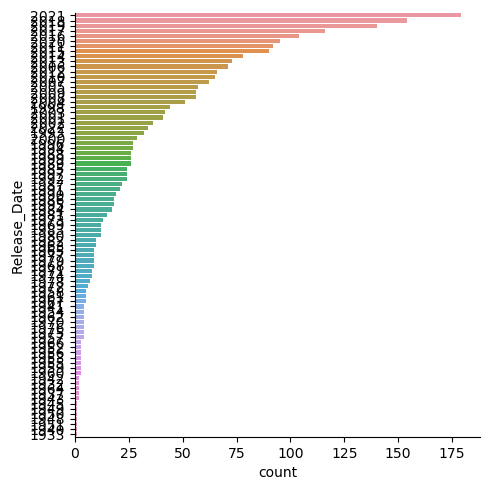

In [44]:
sns.catplot(y= "Release_Date",data= avg_movies, kind= "count",
           order = avg_movies["Release_Date"].value_counts().index)

In [45]:
avg_movies["Release_Date"].value_counts().head()

2021    179
2018    154
2019    140
2017    116
2016    104
Name: Release_Date, dtype: int64

In [46]:
avg_movies[:1]

,Release_Date,Vote_Average
11,2021,average


## 6) What is the correlation between popularity and number of votes ?

In [47]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [48]:
duplicate_data = data.drop("Genre", axis = 1)

In [49]:
duplicate_data = duplicate_data.drop_duplicates()

In [50]:
correlation = duplicate_data["Popularity"].corr(duplicate_data["Vote_Count"])

In [51]:
correlation

0.13739975816244474

## 7) What is the average number of movies released per year ?

In [52]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [53]:
duplicate_data = data.drop("Genre", axis =1)

In [54]:
duplicate_data = duplicate_data.drop_duplicates()

In [55]:
movies_per_year = duplicate_data["Release_Date"].nunique()

In [56]:
movies_per_year

102

In [57]:
total_movies = duplicate_data["Title"].nunique()

In [58]:
total_movies

9513

In [59]:
avg_movies_per_year = total_movies//movies_per_year

In [60]:
avg_movies_per_year

93

## 8) Which Genre should Netflix focus on based on rising on popularity trends ?

In [61]:
data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama


In [62]:
popularity = data.drop(["Title", "Vote_Count", "Vote_Average"], axis = 1)

In [63]:
popularity

,Release_Date,Popularity,Genre
0,2021,5083.954,Action
1,2021,5083.954,Adventure
2,2021,5083.954,Science Fiction
3,2022,3827.658,Crime
4,2022,3827.658,Mystery
...,...,...,...
25788,2021,13.354,Drama
25789,2021,13.354,History
25790,1984,13.354,War
25791,1984,13.354,Drama


In [64]:
popularity = popularity.sort_values(by = "Release_Date")

In [65]:
genre_unique = popularity["Genre"].unique()
c=[]

In [66]:
for i in genre_unique[:]:
    a=popularity[popularity['Genre']==i]
    year_unique=a['Release_Date'].unique()
    k=[]
    for j in year_unique:
        b=a[a["Release_Date"]==j]
        avg_popular=b['Popularity'].sum()//b['Popularity'].count()
        k.append([j,avg_popular])
    c.append([i,k]) 
        

In [89]:
c[:3]

[['Science Fiction',
  [[1902, 18.0],
   [1927, 18.0],
   [1931, 17.0],
   [1933, 21.0],
   [1935, 18.0],
   [1943, 13.0],
   [1951, 16.0],
   [1953, 20.0],
   [1954, 16.0],
   [1955, 14.0],
   [1956, 15.0],
   [1958, 13.0],
   [1960, 19.0],
   [1961, 15.0],
   [1962, 16.0],
   [1963, 16.0],
   [1964, 14.0],
   [1965, 15.0],
   [1966, 31.0],
   [1967, 36.0],
   [1968, 32.0],
   [1969, 17.0],
   [1970, 23.0],
   [1971, 27.0],
   [1972, 17.0],
   [1973, 19.0],
   [1974, 13.0],
   [1975, 17.0],
   [1976, 16.0],
   [1977, 31.0],
   [1978, 27.0],
   [1979, 26.0],
   [1980, 21.0],
   [1981, 22.0],
   [1982, 26.0],
   [1983, 19.0],
   [1984, 19.0],
   [1985, 21.0],
   [1986, 21.0],
   [1987, 27.0],
   [1988, 23.0],
   [1989, 21.0],
   [1990, 38.0],
   [1991, 34.0],
   [1992, 35.0],
   [1993, 40.0],
   [1994, 37.0],
   [1995, 30.0],
   [1996, 22.0],
   [1997, 30.0],
   [1998, 23.0],
   [1999, 29.0],
   [2000, 20.0],
   [2001, 25.0],
   [2002, 28.0],
   [2003, 32.0],
   [2004, 24.0],
   [2005, 

In [90]:
from scipy.stats import linregress

In [91]:
list=[]
for i,genre in enumerate(genre_unique):
    slope,intercept,r_value,p_value,std_err=linregress([x[0] for x in c[i][1]],[x[1] for x in c[i][1]])
    list.append([genre,slope])

In [92]:
list.sort()

In [93]:
list = incre_list[::-1]

In [94]:
list[:1]

[['Action', 0.6642094750137628]]